## 190639B
## Exercise 11

train_images.shape:  (60000, 32, 32)
train_labels.shape:  (60000,)
test_images.shape: (10000, 32, 32)
test_labels.shape: (10000,)


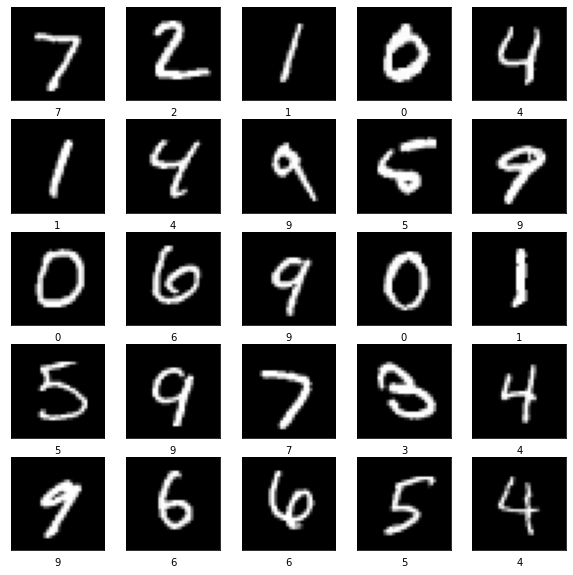

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d_2 (Averag  (None, 14, 14, 6)        0         
 ePooling2D)                                                     
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_3 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 flatten_1 (Flatten)         (None, 400)               0         
                                                                 
 dense_3 (Dense)             (None, 120)              

In [2]:
import tensorflow as tf
from tensorflow import keras
from keras import layers,datasets
import numpy as np
import matplotlib.pyplot as plt

mnist = datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Padding
paddings = tf.constant([[0, 0], [2, 2], [2, 2]])
train_images = tf.pad(train_images, paddings, constant_values=0)
test_images = tf.pad(test_images, paddings, constant_values=0)

print('train_images.shape: ', train_images.shape)
print('train_labels.shape: ', train_labels.shape)
print('test_images.shape:', test_images.shape)
print('test_labels.shape:', test_labels.shape)
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

train_images = tf.dtypes.cast(train_images, tf.float32)
test_images = tf.dtypes.cast(test_images, tf.float32)
train_images, test_images = train_images[..., np.newaxis]/255.0, test_images[..., np.newaxis]/255.0

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(tf.reshape(test_images[i],[32,32]),cmap=plt.cm.gray)
    plt.xlabel(class_names[test_labels[i]])

plt.show()

model=keras.Sequential()
model.add(layers.Conv2D(6,(5,5),activation='relu',input_shape=(32,32,1)))
model.add(layers.AveragePooling2D((2,2)))
model.add(layers.Conv2D(16,(5,5),activation='relu'))
model.add(layers.AveragePooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(120,activation='relu'))
model.add(layers.Dense(84,activation='relu'))
model.add(layers.Dense(10))

model.compile(optimizer='adam',
loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
metrics=['accuracy'])

print(model.summary())

model.fit(train_images,train_labels,epochs=5)

test_loss,test_acc=model.evaluate(test_images,test_labels,verbose=2)

In [3]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images,test_images=train_images/255.0,test_images/255.0
class_names=['airplane','autombile','bird','cat','deer','dog','frog','horse','ship','truck']

print('train_images.shape: ', train_images.shape)
print('train_labels.shape: ', train_labels.shape)
print('test_images.shape:', test_images.shape)
print('test_labels.shape:', test_labels.shape)

model=keras.Sequential()
model.add(layers.Conv2D(32,(5,5),activation='relu',input_shape=(32,32,3)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10))

model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
metrics=['accuracy'])

print(model.summary())

model.fit(train_images,train_labels,epochs=5)

test_loss,test_acc=model.evaluate(test_images,test_labels,verbose=2)

train_images.shape:  (50000, 32, 32, 3)
train_labels.shape:  (50000, 1)
test_images.shape: (10000, 32, 32, 3)
test_labels.shape: (10000, 1)
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 32)        2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_5 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 4, 4, 128)

In [4]:
mnist = datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Padding
paddings = tf.constant([[0, 0], [2, 2], [2, 2]])
train_images = tf.pad(train_images, paddings, constant_values=0)
test_images = tf.pad(test_images, paddings, constant_values=0)

class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

train_images = tf.dtypes.cast(train_images, tf.float32)
test_images = tf.dtypes.cast(test_images, tf.float32)
train_images, test_images = train_images[..., np.newaxis]/255.0, test_images[..., np.newaxis]/255.0

model_base=keras.Sequential()
model_base.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,1)))
model_base.add(layers.MaxPool2D((2,2)))
model_base.add(layers.Conv2D(64,(3,3),activation='relu'))
model_base.add(layers.MaxPool2D((2,2)))
model_base.add(layers.Conv2D(64,(3,3),activation='relu'))
model_base.add(layers.Flatten())
model_base.add(layers.Dense(64,activation='relu'))
model_base.add(layers.Dense(10))

model_base.compile(optimizer=keras.optimizers.Adam(),
loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
metrics=['accuracy'])

print(model_base.summary())

model_base.fit(train_images,train_labels,epochs=2)
test_loss,test_acc=model_base.evaluate(test_images,test_labels,verbose=2)
model_base.save_weights('saved_weights/')

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 30, 30, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten_3 (Flatten)         (None, 1024)             

In [5]:
model_lw=keras.Sequential()
model_lw.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,1)))
model_lw.add(layers.MaxPool2D((2,2)))
model_lw.add(layers.Conv2D(64,(3,3),activation='relu'))
model_lw.add(layers.MaxPool2D((2,2)))
model_lw.add(layers.Conv2D(64,(3,3),activation='relu'))
model_lw.add(layers.Flatten())
model_lw.add(layers.Dense(64,activation='relu'))
model_lw.add(layers.Dense(10))

model_lw.compile(optimizer=keras.optimizers.Adam(),
loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
metrics=['accuracy'])

print(model_lw.summary())

model_lw.load_weights('saved_weights/')

model_lw.fit(train_images,train_labels,epochs=2)
test_loss,test_acc=model_lw.evaluate(test_images,test_labels,verbose=2)

model_lw.save('saved_model/')

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 30, 30, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 4, 4, 64)          36928     
                                                                 
 flatten_4 (Flatten)         (None, 1024)             

INFO:tensorflow:Assets written to: saved_model/assets


INFO:tensorflow:Assets written to: saved_model/assets


In [6]:
model_ld=keras.models.load_model('saved_model/')
print(model_ld.summary())
model_ld.evaluate(test_images,test_labels,verbose=2)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 30, 30, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 4, 4, 64)          36928     
                                                                 
 flatten_4 (Flatten)         (None, 1024)             

[0.03483960032463074, 0.9898999929428101]

In [7]:
base_innputs=model_ld.layers[0].input
base_ouputs=model_ld.layers[-2].output
output=layers.Dense(10)(base_ouputs)

new_model=keras.Model(inputs=base_innputs,outputs=output)
new_model.compile(optimizer=keras.optimizers.Adam(),
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'])
print(new_model.summary())
new_model.fit(train_images,train_labels,epochs=3,verbose=2)
new_model.evaluate(test_images,test_labels,verbose=2)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10_input (InputLayer  [(None, 32, 32, 1)]      0         
 )                                                               
                                                                 
 conv2d_10 (Conv2D)          (None, 30, 30, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                             

[0.028184719383716583, 0.9919999837875366]

In [8]:
model_tl=keras.models.load_model('saved_model/')
model_tl.trainable=False
for layer in model_tl.layers:
    assert layer.trainable==False

base_innputs=model_tl.layers[0].input
base_ouputs=model_tl.layers[-2].output
output=layers.Dense(10)(base_ouputs)

model_tl=keras.Model(inputs=base_innputs,outputs=output)
model_tl.compile(optimizer=keras.optimizers.Adam(),
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'])
print(model_tl.summary())
model_tl.fit(train_images,train_labels,epochs=3,verbose=2)
model_tl.evaluate(test_images,test_labels,verbose=2)

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10_input (InputLayer  [(None, 32, 32, 1)]      0         
 )                                                               
                                                                 
 conv2d_10 (Conv2D)          (None, 30, 30, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                           

[0.025489715859293938, 0.9926999807357788]

In [9]:
model_tl=keras.applications.resnet_v2.ResNet50V2()

model_tl.trainable=False
for layer in model_tl.layers:
    assert layer.trainable==False

base_innputs=model_tl.layers[0].input
base_ouputs=model_tl.layers[-2].output
output=layers.Dense(5)(base_ouputs)

model_tl=keras.Model(inputs=base_innputs,outputs=output)
model_tl.compile(optimizer=keras.optimizers.Adam(),
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'])
print(model_tl.summary())

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [10]:
train_images=tf.random.normal(shape=(5,224, 224, 3))
train_labels=tf.constant([0,1,2,3,4])

model_tl.fit(train_images,train_labels,epochs=10,verbose=2)


Epoch 1/10
1/1 - 4s - loss: 2.1099 - accuracy: 0.2000 - 4s/epoch - 4s/step
Epoch 2/10
1/1 - 0s - loss: 1.9479 - accuracy: 0.2000 - 24ms/epoch - 24ms/step
Epoch 3/10
1/1 - 0s - loss: 1.8221 - accuracy: 0.2000 - 22ms/epoch - 22ms/step
Epoch 4/10
1/1 - 0s - loss: 1.7250 - accuracy: 0.2000 - 24ms/epoch - 24ms/step
Epoch 5/10
1/1 - 0s - loss: 1.6506 - accuracy: 0.2000 - 34ms/epoch - 34ms/step
Epoch 6/10
1/1 - 0s - loss: 1.5933 - accuracy: 0.2000 - 33ms/epoch - 33ms/step
Epoch 7/10
1/1 - 0s - loss: 1.5482 - accuracy: 0.4000 - 27ms/epoch - 27ms/step
Epoch 8/10
1/1 - 0s - loss: 1.5112 - accuracy: 0.4000 - 23ms/epoch - 23ms/step
Epoch 9/10
1/1 - 0s - loss: 1.4805 - accuracy: 0.4000 - 29ms/epoch - 29ms/step
Epoch 10/10
1/1 - 0s - loss: 1.4555 - accuracy: 0.6000 - 29ms/epoch - 29ms/step
